# Praca domowa 5
## Michał Wdowski

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Import danych:

In [2]:
data = pd.read_csv("../../clustering.csv", names = ["x", "y"])
data.head()

,x,y
0,41.788907,52.220182
1,-96.586516,90.957033
2,-54.143591,-99.153377
3,19.929231,-45.859779
4,-82.941076,84.099186


Wykres danych:

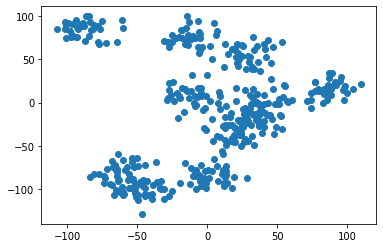

In [3]:
plt.scatter(data["x"], data["y"])

## k-means

Funkcja tworząca i rysująca klastry:

In [4]:
from sklearn.cluster import KMeans

def plot_kmeans_clusters(X, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(X)
    y_kmeans = kmeans.predict(X)
    plt.scatter(X["x"], X["y"], c=y_kmeans, s=30, cmap='viridis')

    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.75)
    plt.title('K-means clusters')
    plt.show()

Funkcja generująca ocenę klastrów do metody łokcia:

In [5]:
def count_wcss_scores(X, k_max):
    #  WCSS = within-cluster sum of squares
    scores = []
    for k in range(1, k_max+1):
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(X)
        wcss = kmeans.score(X) * -1 # score returns -WCSS
        scores.append(wcss)
    return scores

Wyniki dla odpowiednich k do metody łokcia:

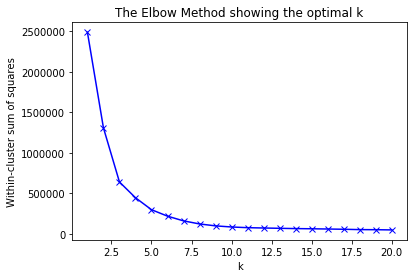

In [6]:
wcss_vec = count_wcss_scores(data, 20)
x_ticks = list(range(1, len(wcss_vec) + 1))
plt.plot(x_ticks, wcss_vec, 'bx-')
plt.xlabel('k')
plt.ylabel('Within-cluster sum of squares')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Metoda łokcia jest o tyle dobrą nazwą, że przywodzi na myśl dawną jednostkę miary o tej samej nazwie. Wybór odpowiedniego $k$ można porównać do mierzenia sukna łokciem kupca, a przecież nie każdy ma łokcie tej samej długości., dlatego też dokładność będzie pozostawiać wiele do życzenia.

Weźmy na oko $k = 9$.

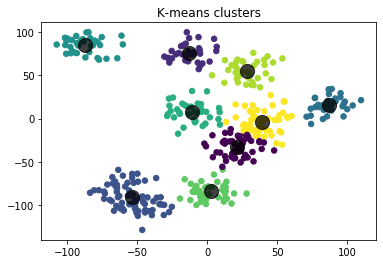

In [7]:
plot_kmeans_clusters(data, n_clusters = 9)

Wyniki dla odpowiednich k do metody silhouette.

Tu z kolei maksimum ewidentnie pojawia się dla $k = 8$.

Obydwa przyporządkowania w sumie mają jakiś sens. Dla $k = 9$ można mieć wątpliwości co do rozdzielenia klastrów "w pół". Z drugiej strony dla $k = 8$ niektóre rekorsy zostały przyporządkowane do jednego klastra, mimo że na oko powinny być w drugim. Gdybym miał się zdecydowac na któryś z wyników, to wybrałbym $k = 8$ i ewentualnie jakoś dopracował metodę przydzielania punktów do klastrów.

## AgglomerativeClustering

Funkcja generująca ocenę klastrów do metody silhouette:

In [8]:
def count_clustering_scores(X, cluster_num, model, score_fun):
    if isinstance(cluster_num, int):
        cluster_num_iter = [cluster_num]
    else:
        cluster_num_iter = cluster_num
        
    scores = []    
    for k in cluster_num_iter:
        model_instance = model(n_clusters=k)
        labels = model_instance.fit_predict(X)
        wcss = score_fun(X, labels)
        scores.append(wcss)
    
    if isinstance(cluster_num, int):
        return scores[0]
    else:
        return scores

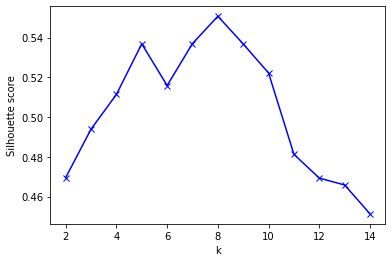

In [9]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

cluster_num_seq = range(2, 15)
silhouette_vec = count_clustering_scores(data, cluster_num_seq, AgglomerativeClustering, silhouette_score)
plt.plot(cluster_num_seq, silhouette_vec, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.show()

Dla klasteryzacji aglomeracyjnej wyszło nam ewidentnie, że $k = 8$ jest optymalną wartością.

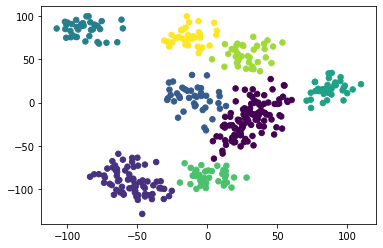

In [10]:
def plot_agglomerative_clustering(X, n_clusters):
    model = AgglomerativeClustering(n_clusters=n_clusters)
    y = model.fit_predict(X)
    plt.scatter(X["x"], X["y"], c=y, s=30, cmap='viridis')
    plt.show()

plot_agglomerative_clustering(data, 8)

I w sumie wyszło bardzo ładnie, gdybym dostał te punkty na papierze wraz z zestawem kredek, to w 99% tak właśnie bym je pokolorował.